In [ ]:
# after istalling tenserflow dont forgret to restart the kernel or enviornment

## Vision


This program is not made efficient that why may not do the correct prediction.
This program demonstrates training a neural network on the MNIST dataset and predict the handwritten digit recognition.
The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).



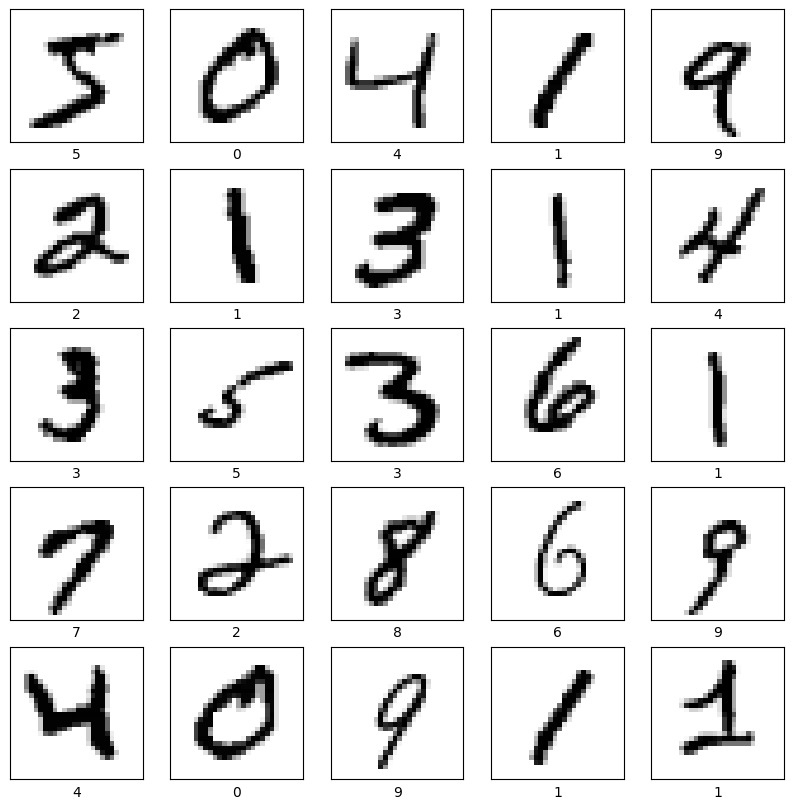

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2937 - accuracy: 0.9150 - val_loss: 0.1370 - val_accuracy: 0.9588
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1448 - accuracy: 0.9574 - val_loss: 0.1064 - val_accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1091 - accuracy: 0.9667 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.0793 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.0715 - val_accuracy: 0.9771


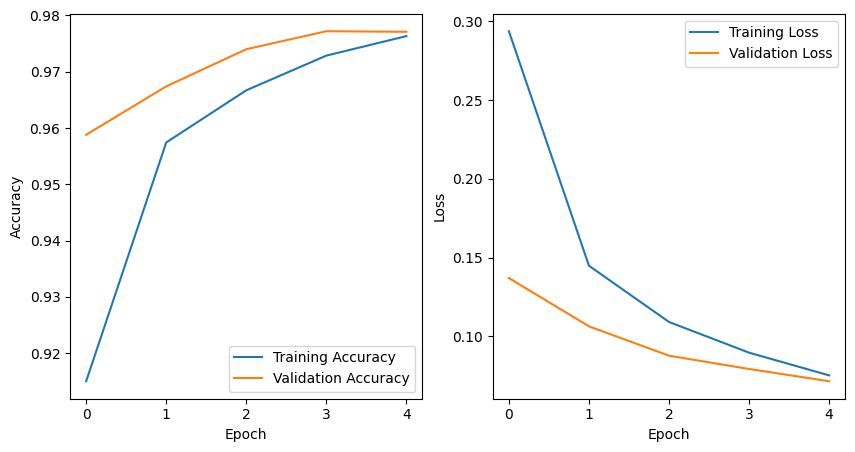

User Input: Provide a digit number (1-9) to the model for prediction.


Enter a digit number (1-9):  4


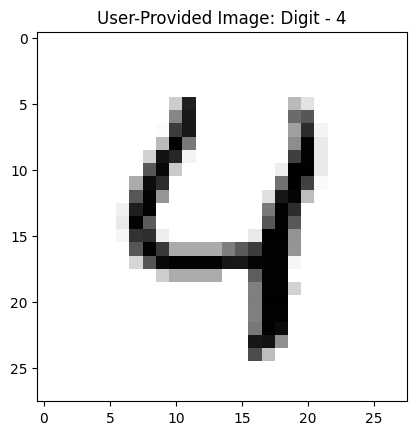

1/1 [==============================] - 0s 118ms/step
Model Prediction: The model predicts the digit as 4


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

display(Markdown("## Vision\n"))

print("This program is not made efficient that why may not do the correct prediction.")
print("This program demonstrates training a neural network on the MNIST dataset and predict the handwritten digit recognition.")
print("The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).\n")


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("User Input: Provide a digit number (1-9) to the model for prediction.")

user_input = int(input("Enter a digit number (1-9): "))

plt.imshow(test_images[user_input], cmap=plt.cm.binary)
plt.title(f"User-Provided Image: Digit - {user_input}")
plt.show()

user_prediction = model.predict(np.expand_dims(test_images[user_input], axis=0))

predicted_digit = np.argmax(user_prediction[0])
print(f"Model Prediction: The model predicts the digit as {predicted_digit}")
